# Multi-Head Attention
[link](https://ut.philkr.net/deeplearning/transformers/multihead_attention/)

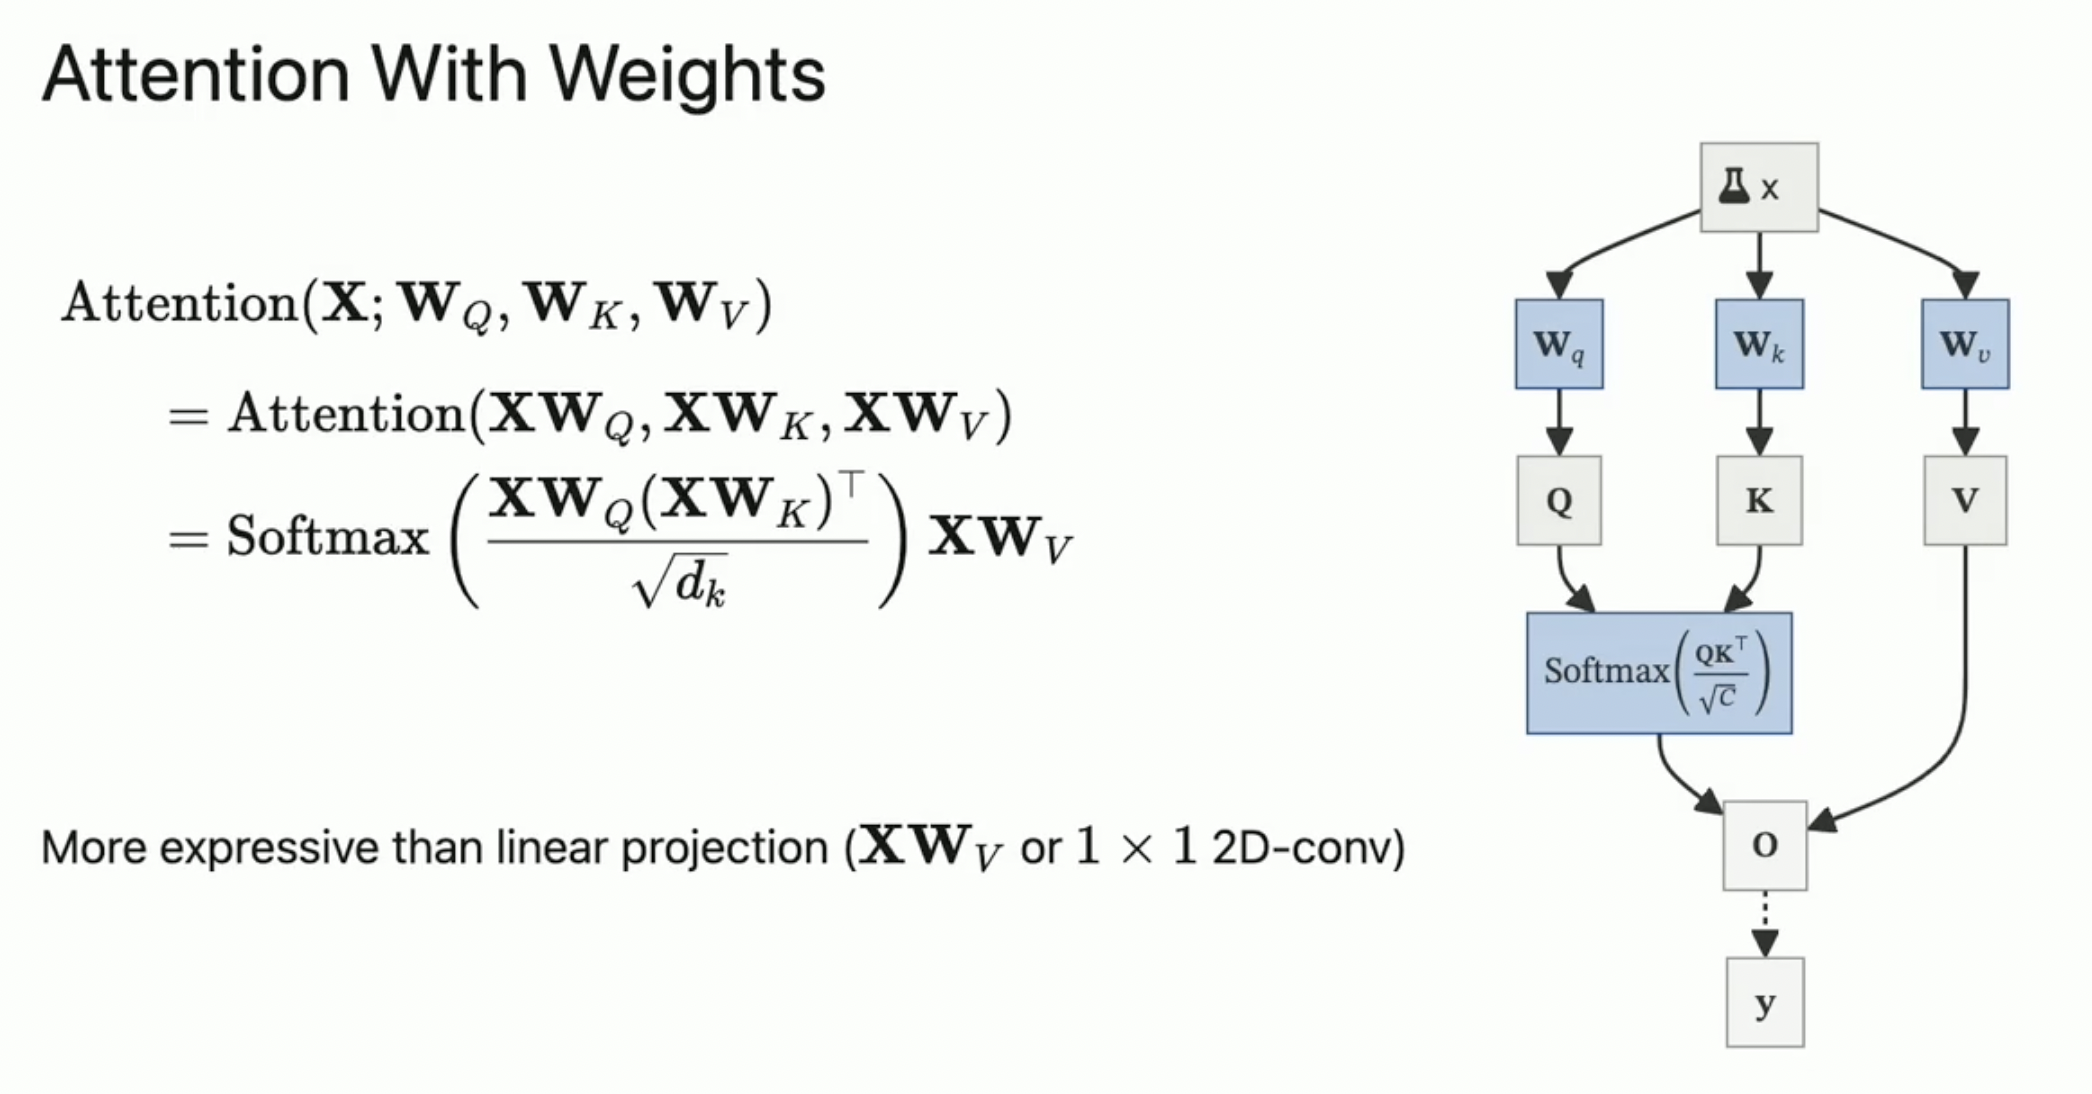

## Self-attention
Inputs
* $X \in \mathbb{R}^{N \times c}$ 

Weights
* a set of querry weights $W_q \in \mathbb{R}^{c\times d_k}$ and bias $b_q\in \mathbb{R}^{d_k}$
* a set of key weights $W_k \in \mathbb{R}^{c \times d_k}$ and bias $b_k\in \mathbb{R}^{d_k}$
* a set of value weights $W_v \in \mathbb{R}^{c \times d_v}$ and bias $b_q\in \mathbb{R}^{d_v}$

Output: 
* Output $O= [o_1|o_2|\dots|o_N]^T \in\mathbb{R}^{N\times d_v}$
\begin{align*}
O =\text{SelfAttention}_{\mathcal{W}}(X)=\text{Attention}_{\mathcal{W}}(X,X,X),
\end{align*}
where
\begin{align*}
\mathcal{W} &= \{W_q,b_q,W_k,b_k,W_v,b_v\}.
\end{align*}

This weight matrices allows to attend more to other elements than itself. Notice that in the unweighted Self-Attention we have 
$$\alpha = \text{softmax}{\left(\frac{XX^T}{\sqrt{d_k}}\right)} \in \mathbb{R}^{N\times N}$$
 
where $X=[x_1|x_2|\dots|x_N]^T\in\mathbb{R}^{N \times C}$ and 
$$XX^T=\begin{pmatrix}x_1^Tx_1 & x_1^Tx_2 & \cdots & x_1^Tx_N \\
x_2^Tx_1 & x_2^Tx_2 & \cdots & x_2^Tx_N \\
\vdots & \vdots & \ddots & \vdots \\
x_N^Tx_1 & x_N^Tx_2 & \cdots & x_N^Tx_N \\
\end{pmatrix}  \in \mathbb{R}^{N\times N}.$$
Notice that, from 
\begin{align*}
(x_i-x_j)^T(x_i-x_j)&\geq 0\\
(x_i^T-x_j^T)(x_i-x_j)&\geq 0\\
x_i^Tx_i-2x_i^Tx_j+x_j^Tx_j&\geq 0 \\
x_i^Tx_j&\leq\frac{1}{2}(x_i^Tx_i+x_j^Tx_j)\\
x_i^Tx_j&\leq\max\{x_i^Tx_i,x_j^Tx_j\}
\end{align*}

So, $x_i$ cannot pay more attention to $x_j$ than the attentions $x_i$ and $x_j$ pays to themse 

Notice that, as in avery machine learning problem, the weights are shared across all inputs (values of $X$), so is the attention is complex and it changes fro one region of the input sapce to other, we may need to increase the esprexness of our model. The way of doing this is trough multi-head attention.  

## Multi-Head Attention

Inputs
* a set of queries $Q = [q_1|q_2|\dots|q_M]^T \in \mathbb{R}^{M \times c_q}$
* a set of keys $K = [k_1|k_2|\dots|k_N]^T \in \mathbb{R}^{N \times c_k}$
* a set of values $V = [v_1|v_2|\dots|v_N]^T \in \mathbb{R}^{N \times c_v}$

Weights
* $W_{q,i} \in \mathbb{R}^{c_q \times d_k}$ and $b_{q,i}\in \mathbb{R}^{d_k}$, $\quad i=1,2,\dots,h.$
* $W_{k,i} \in \mathbb{R}^{c_k \times d_k}$ and $b_{k,i}\in \mathbb{R}^{d_k}$, $\quad i=1,2,\dots,h.$
* $W_{v,i} \in \mathbb{R}^{c_v \times d_v}$ and $b_{v,i}\in \mathbb{R}^{d_v}$, $\quad i=1,2,\dots,h.$
* $W_{o} \in \mathbb{R}^{d_vh \times d_o }$ and $b_{o}\in \mathbb{R}^{d_0}$.

Output: 
* Output $O= [o_1|o_2|\dots|o_M]^T \in\mathbb{R}^{M\times d_o}$
\begin{align*}
O  &= \text{MultiHeadAttention}_{\{\mathcal{W}_{i}\}_{i=1}^h\cup \{W_o,b_o\}}(Q,K,V),\\
&=\begin{pmatrix}
\text{Attention}_{\mathcal{W}_{1}}(Q,K,V)|
\text{Attention}_{\mathcal{W}_{2}}(Q,K,V)|
\dots|
\text{Attention}_{\mathcal{W}_{h}}(Q,K,V)
\end{pmatrix}W_o + B_o
\end{align*}
where
\begin{align*}
B_o  &= [b_o|b_o|\dots|b_o]^T \in \mathbb{R}^{M \times d_o},\\ 
\mathcal{W}_i &= \{W_{q,i},b_{q,i},W_{k,i},b_{k,i},W_{v,i},b_{v,i}\}, \quad i = 1,2,\dots,h.
\end{align*}

Usually we have:
 * $d_h:=d_k=d_v$ (head dimensions)
 * $d := c_q = c_k = c_v = d_h\cdot h = d_o$ (model dimension)  
**Note:** In this case, internally we have:
    * $W_q=[W_{q,1}|W_{q,2}|\dots|W_{q,h}]\in\mathbb{R}^{d\times d}$  
    * $W_k=[W_{k,1}|W_{k,2}|\dots|W_{k,h}]\in\mathbb{R}^{d\times d}$  
    * $W_v=[W_{v,1}|W_{v,2}|\dots|W_{v,h}]\in\mathbb{R}^{d\times d}$  

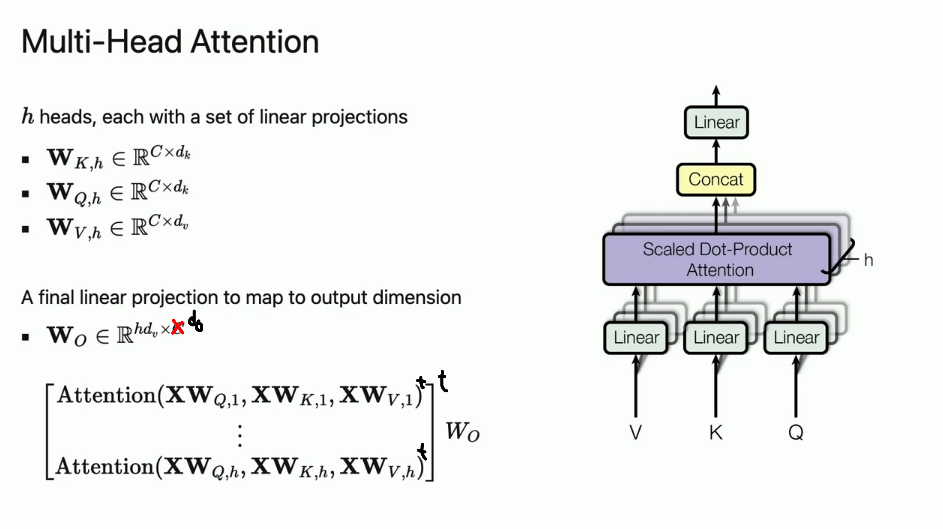

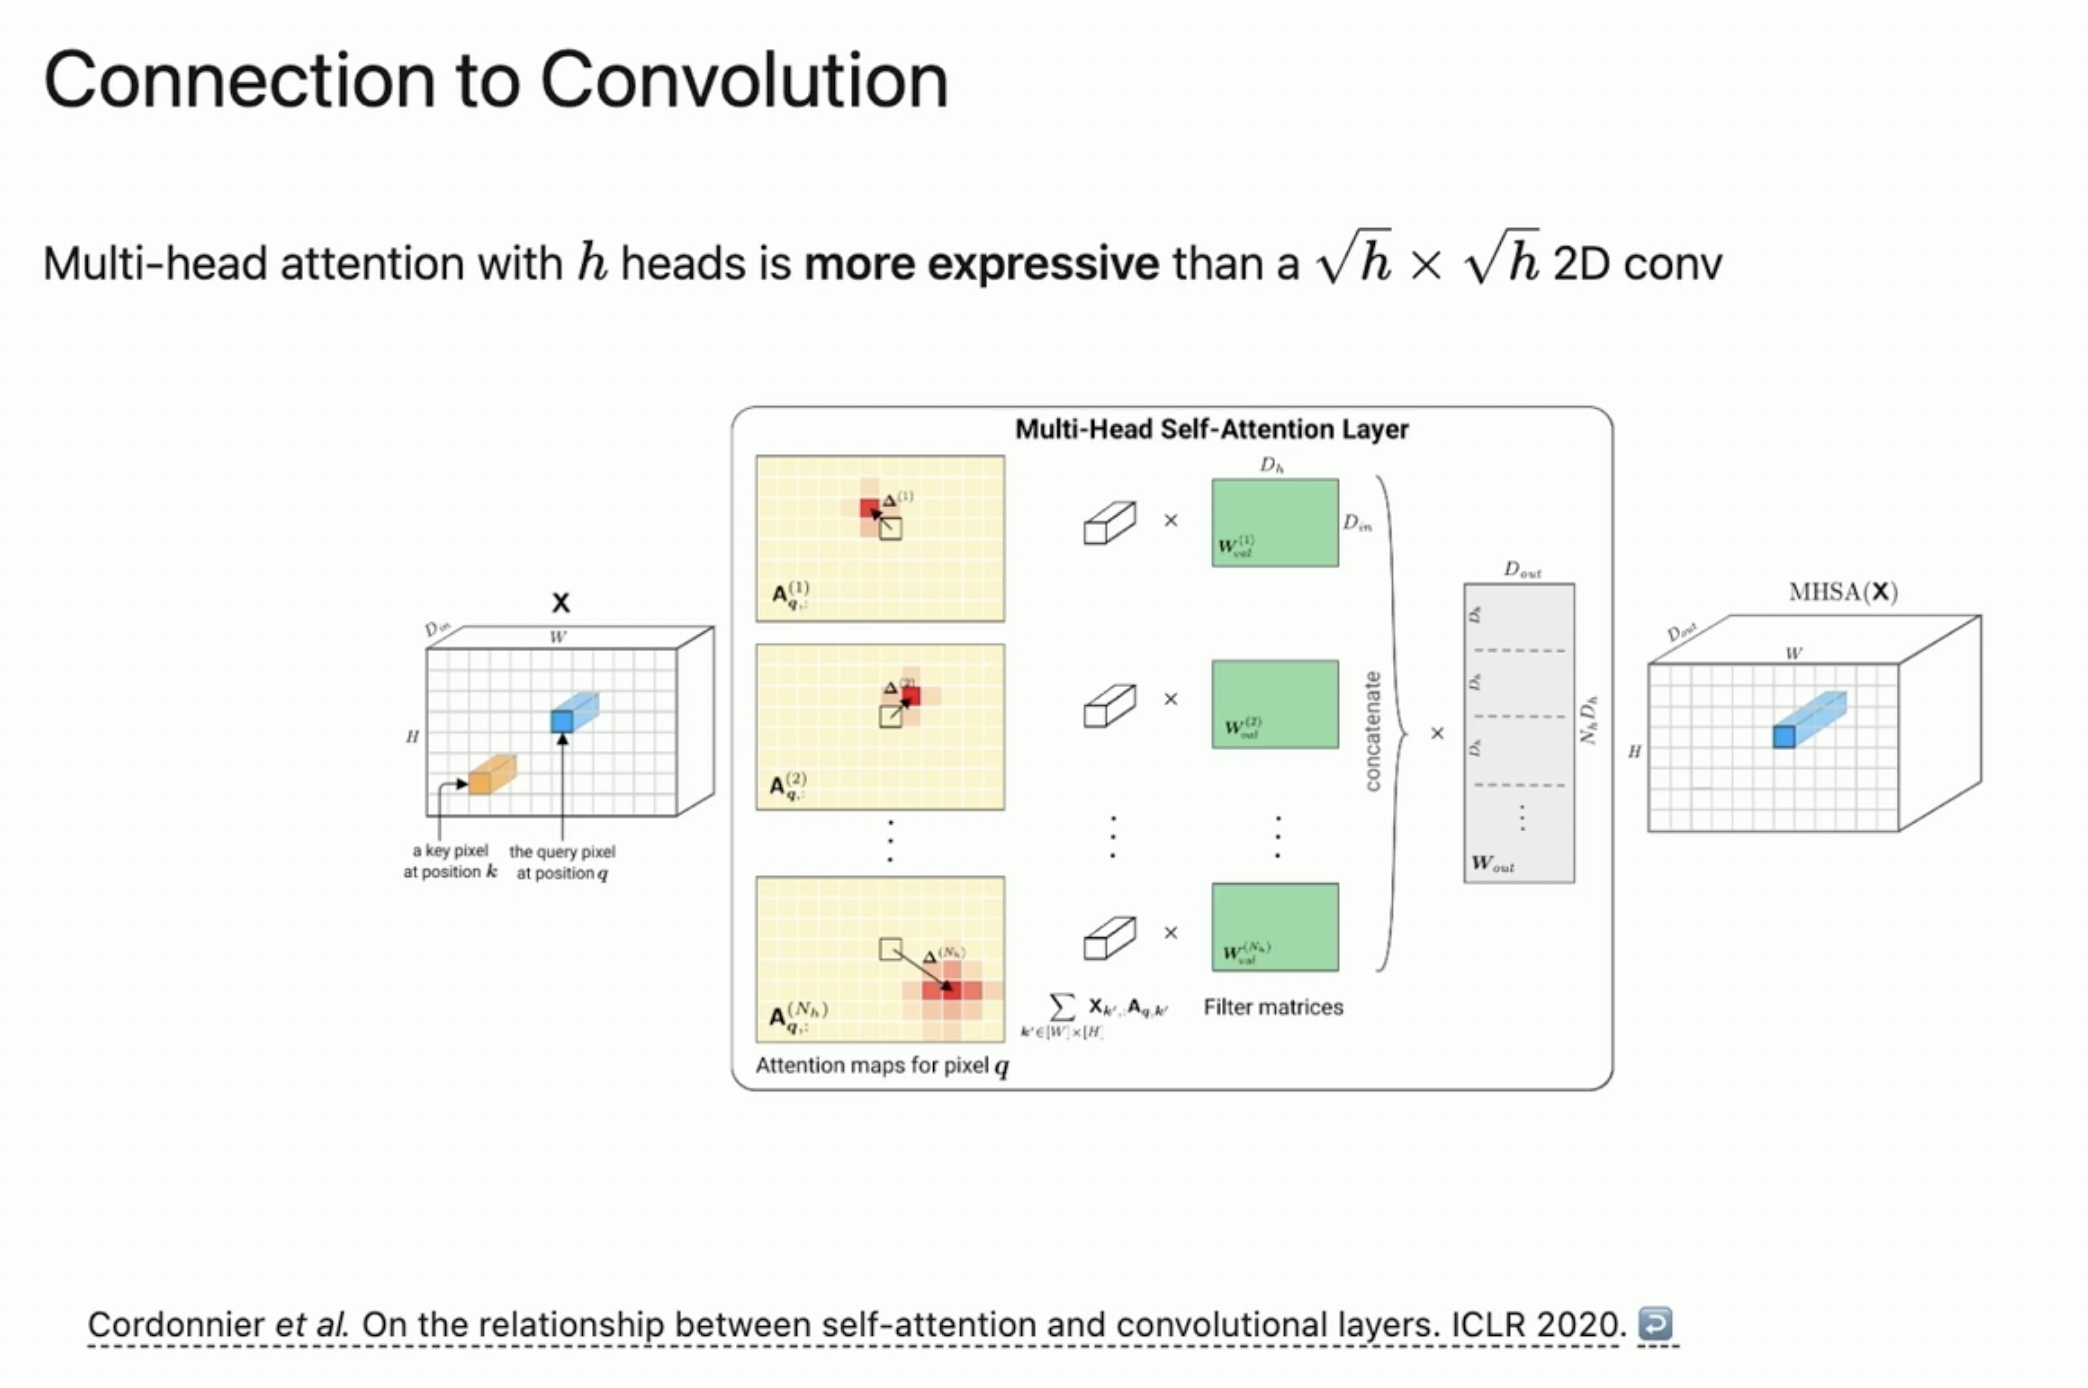

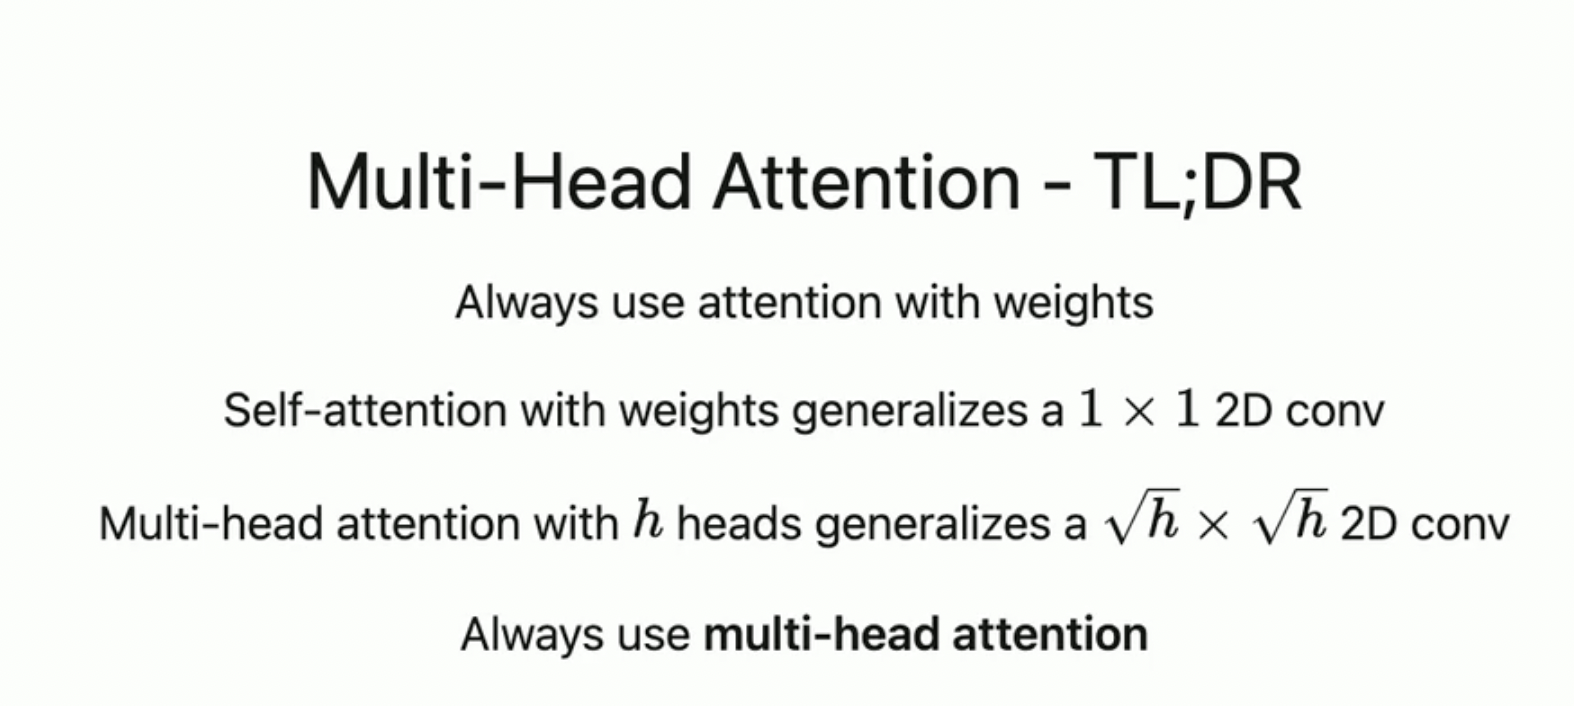